In [12]:
#Realizamos la importacion de las librerias a usar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Cargar los conjuntos de datos desde los archivos CSV
mnist_train = pd.read_csv(r"C:\Users\jquinteros\OneDrive - Esri NOSA\Joffre Quinteros\Maestria\Modelos y aprendizajes\Clase 1 datos\Tarea\mnist_train.csv")
mnist_test = pd.read_csv(r"C:\Users\jquinteros\OneDrive - Esri NOSA\Joffre Quinteros\Maestria\Modelos y aprendizajes\Clase 1 datos\Tarea\mnist_test.csv")

In [14]:
#Explorar los datos 
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [16]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [18]:
# Paso 3: Crear nuevas características
# Por ejemplo, podríamos calcular la suma de intensidades de cada imagen
#Se crea un nuevo campo que se llama suma_intensidades que es igual a selecciona todas las filas y columnas excluyendo la primera. Iloc es para indices enteros
#axis 1 lo que hace es usar la operacion de suma para cada fila ya que representa a cada numero.
#La nueva columna lo que hace es la suma de intensidades de cada numero.
mnist_train['suma_intensidades'] = mnist_test.iloc[:, 1:].sum(axis=1)
mnist_test['suma_intensidades'] = mnist_test.iloc[:, 1:].sum(axis=1)

In [ ]:
X=mnist_train.drop(['label'],axis=1) #Se elimina la columna label que continene los nombres de las columnas para entrenar X
y=mnist_train['label'] #train_data['label'] viene a ser la variable y

In [ ]:
X.head()

In [ ]:
y.head()

In [19]:
#Se genera el set de entrenamiento. 

#test_size especifica que el 20% se tomara como conjunto de datos de prueba y el 80% de entrenamiento
#Random_state permite que la semilla sea reproducible
#Nota: Se puede configurar para que el X y Y sean calculados a parte y traer las variables aca
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [20]:
#Se utiliza el algoritmo Suport Vector Classification solo se declara el modelo y que tome los parametros por defecto
modelo = SVC()
# Paso 6: Entrenar el modelo
modelo.fit(X_train, y_train) #Se utiliza para entrenar los modelo X_train y Y_train declarados anteriormente. Asi el modelo buscara la clasificacion
#de las clases y parametros establecidos

SVC()

In [21]:
# Paso 7: Evaluar el modelo
#Se realiza el modelo para realizar predicciones con el modelo entrenado con el conjunto de prueba x_test
y_pred = modelo.predict(X_test)

#Se calcula la matriz de ocnfusion de la libreria scikit-learn para determinar verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
conf_matrix = confusion_matrix(y_test, y_pred)


## Formulas para determinar la precision, sensibilidad y especificidad

Precisión:

Precision =Verdaderos Positivos /(Verdaderos Positivos +Falsos Positivos)


Sensibilidad :

Sensibilidad= Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)
 

Especificidad (True Negative Rate):

Especificidad = Verdaderos Negativos /(Verdaderos Negativos + Falsos Positivos)

​


In [22]:
#del rendimiento del modelo, como calcular la precisión, la sensibilidad y la especificidad para cada clase
# Calcular métricas para cada clase
precision = precision_score(y_test, y_pred, average=None)
sensibilidad = recall_score(y_test, y_pred, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
for i in range(len(precision)):
    print(f'Clase {i}:')
    print(f'  Precisión: {precision[i]:.4f}')
    print(f'  Sensibilidad: {sensibilidad[i]:.4f}')
    print()

print(f'Precisión Global (Accuracy): {accuracy:.4f}')

Clase 0:
  Precisión: 0.9433
  Sensibilidad: 0.9489

Clase 1:
  Precisión: 0.8616
  Sensibilidad: 0.9607

Clase 2:
  Precisión: 0.9004
  Sensibilidad: 0.8543

Clase 3:
  Precisión: 0.9057
  Sensibilidad: 0.8269

Clase 4:
  Precisión: 0.8872
  Sensibilidad: 0.9031

Clase 5:
  Precisión: 0.8574
  Sensibilidad: 0.8822

Clase 6:
  Precisión: 0.9311
  Sensibilidad: 0.9414

Clase 7:
  Precisión: 0.9234
  Sensibilidad: 0.8915

Clase 8:
  Precisión: 0.8677
  Sensibilidad: 0.8371

Clase 9:
  Precisión: 0.8518
  Sensibilidad: 0.8710

Precisión Global (Accuracy): 0.8924


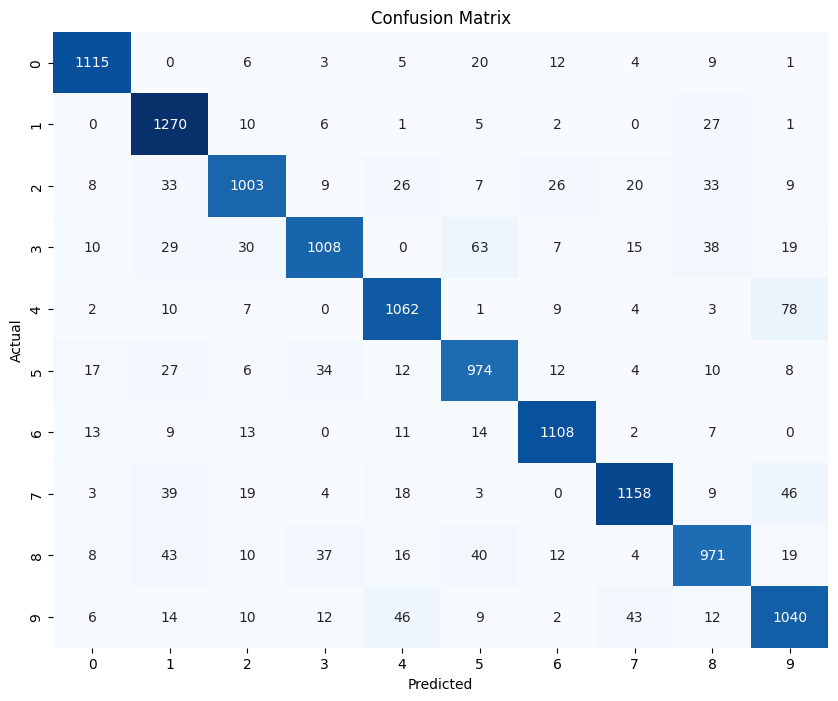

In [23]:
# Paso 8: Dibujar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()